### Exploratory Data Analysis with Pandas and Python 3.x - Mohammed Kashif

In [1]:
# https://github.com/PacktPublishing/Exploratory-Data-Analysis-with-Pandas-and-Python-3.x

#### Descriptive Statistics

In [2]:
import numpy as np
import pandas as pd

In [3]:
my_list = [5,4,3,6,5,4,8,2,1]

np.mean(my_list)

4.222222222222222

In [4]:
np.median(my_list)

4.0

In [5]:
np.sort(my_list)

array([1, 2, 3, 4, 4, 5, 5, 6, 8])

In [6]:
from scipy.stats import mode

In [7]:
mode(my_list)

ModeResult(mode=array([4]), count=array([2]))

In [8]:
np.std(my_list)

1.9876159799998132

In [9]:
# That means majority of the values will lie between the (mean - std) to (mean + std) values

print(np.mean(my_list) - np.std(my_list))
print(np.mean(my_list) + np.std(my_list))

2.234606242222409
6.209838202222036


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
x = np.random.normal(50, 5, 3000) # format is (mean, STD, size)

In [12]:
max(x)

68.2918435402906

In [13]:
min(x)

31.401808230060738

In [14]:
max(x) - min(x)

36.89003531022986

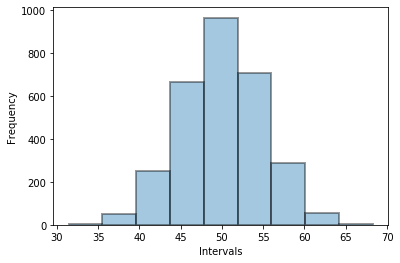

In [16]:
sns.distplot(x, kde=False, bins=9, hist_kws=dict(edgecolor='k', linewidth=2))
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()

In [17]:
np.percentile(my_list, 50)

4.0

In [18]:
np.percentile(my_list, 100)

8.0

In [19]:
np.percentile(my_list, 99)

7.84

In [20]:
np.percentile(my_list, [25, 50, 75])

array([3., 4., 5.])

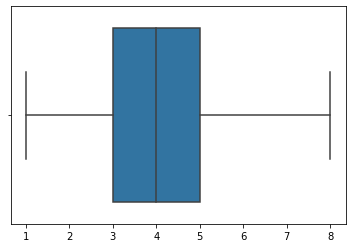

In [23]:
sns.boxplot(my_list)

#### Dealing with Missing Data

In [25]:
movie=pd.read_csv('movie.csv')

In [26]:
movie.isnull().sum() # number of null values in each column

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [32]:
df = pd.read_csv('dummy_missing_majority.csv', index_col=0)

In [33]:
df

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                         
1       John  25.0       160.0        80.0     USA  New York
2      Jimmy  26.0       163.0         NaN      UK    London
3    Felicia  28.0       154.0         NaN     USA     Miami
4     Sophia   NaN       143.0         NaN     NaN       NaN
5        Bob   NaN         NaN         NaN     NaN       NaN
6      Billy  30.0       156.0         NaN  France     Paris
7       Kate  31.0       160.0         NaN   Italy      Rome
8       Will  29.0         NaN         NaN  Russia    Moscow
9      Scott   NaN       148.0         NaN     NaN       NaN

In [34]:
df.dropna() # returns only 1 row out of the whole data, hence we cannot use dropna in this case

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                      
1    John  25.0       160.0        80.0     USA  New York

In [35]:
df.dropna(thresh=4) # at least 4 non-null values in a row to consider it, otherwise drop it

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                         
1       John  25.0       160.0        80.0     USA  New York
2      Jimmy  26.0       163.0         NaN      UK    London
3    Felicia  28.0       154.0         NaN     USA     Miami
6      Billy  30.0       156.0         NaN  France     Paris
7       Kate  31.0       160.0         NaN   Italy      Rome
8       Will  29.0         NaN         NaN  Russia    Moscow

In [42]:
# dropping columns which have more missing values than the threshold

df.dropna( axis=1, thresh = int(0.4 * len(df)) ) # you can see that 'marks' column has been dropped

Name   Age  Height(cm) Country      City
Sno                                             
1       John  25.0       160.0     USA  New York
2      Jimmy  26.0       163.0      UK    London
3    Felicia  28.0       154.0     USA     Miami
4     Sophia   NaN       143.0     NaN       NaN
5        Bob   NaN         NaN     NaN       NaN
6      Billy  30.0       156.0  France     Paris
7       Kate  31.0       160.0   Italy      Rome
8       Will  29.0         NaN  Russia    Moscow
9      Scott   NaN       148.0     NaN       NaN

In [43]:
# applying the same logic (of multiplying % with len) to rows

df.dropna(axis=0, thresh = int(0.6 * len(df.columns)) )

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                         
1       John  25.0       160.0        80.0     USA  New York
2      Jimmy  26.0       163.0         NaN      UK    London
3    Felicia  28.0       154.0         NaN     USA     Miami
6      Billy  30.0       156.0         NaN  France     Paris
7       Kate  31.0       160.0         NaN   Italy      Rome
8       Will  29.0         NaN         NaN  Russia    Moscow

In [41]:
len(df.columns)

6

In [44]:
int(0.6 * len(df.columns))

3

In [45]:
df

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                         
1       John  25.0       160.0        80.0     USA  New York
2      Jimmy  26.0       163.0         NaN      UK    London
3    Felicia  28.0       154.0         NaN     USA     Miami
4     Sophia   NaN       143.0         NaN     NaN       NaN
5        Bob   NaN         NaN         NaN     NaN       NaN
6      Billy  30.0       156.0         NaN  France     Paris
7       Kate  31.0       160.0         NaN   Italy      Rome
8       Will  29.0         NaN         NaN  Russia    Moscow
9      Scott   NaN       148.0         NaN     NaN       NaN

In [46]:
# filling all NaN values with a generic value

df.fillna(999)

Name    Age  Height(cm)  Marks(100) Country      City
Sno                                                          
1       John   25.0       160.0        80.0     USA  New York
2      Jimmy   26.0       163.0       999.0      UK    London
3    Felicia   28.0       154.0       999.0     USA     Miami
4     Sophia  999.0       143.0       999.0     999       999
5        Bob  999.0       999.0       999.0     999       999
6      Billy   30.0       156.0       999.0  France     Paris
7       Kate   31.0       160.0       999.0   Italy      Rome
8       Will   29.0       999.0       999.0  Russia    Moscow
9      Scott  999.0       148.0       999.0     999       999

In [47]:
df.bfill()

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                         
1       John  25.0       160.0        80.0     USA  New York
2      Jimmy  26.0       163.0         NaN      UK    London
3    Felicia  28.0       154.0         NaN     USA     Miami
4     Sophia  30.0       143.0         NaN  France     Paris
5        Bob  30.0       156.0         NaN  France     Paris
6      Billy  30.0       156.0         NaN  France     Paris
7       Kate  31.0       160.0         NaN   Italy      Rome
8       Will  29.0       148.0         NaN  Russia    Moscow
9      Scott   NaN       148.0         NaN     NaN       NaN

In [48]:
df.ffill()

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                         
1       John  25.0       160.0        80.0     USA  New York
2      Jimmy  26.0       163.0        80.0      UK    London
3    Felicia  28.0       154.0        80.0     USA     Miami
4     Sophia  28.0       143.0        80.0     USA     Miami
5        Bob  28.0       143.0        80.0     USA     Miami
6      Billy  30.0       156.0        80.0  France     Paris
7       Kate  31.0       160.0        80.0   Italy      Rome
8       Will  29.0       160.0        80.0  Russia    Moscow
9      Scott  29.0       148.0        80.0  Russia    Moscow

In [52]:
# replacing all NaNs 'Age' and 'Marks' with mean values

map_dict = {'Age': df['Age'].mean(), 'Marks(100)': df['Marks(100)'].mean()}

df.fillna(value=map_dict)

Name        Age  Height(cm)  Marks(100) Country      City
Sno                                                              
1       John  25.000000       160.0        80.0     USA  New York
2      Jimmy  26.000000       163.0        80.0      UK    London
3    Felicia  28.000000       154.0        80.0     USA     Miami
4     Sophia  28.166667       143.0        80.0     NaN       NaN
5        Bob  28.166667         NaN        80.0     NaN       NaN
6      Billy  30.000000       156.0        80.0  France     Paris
7       Kate  31.000000       160.0        80.0   Italy      Rome
8       Will  29.000000         NaN        80.0  Russia    Moscow
9      Scott  28.166667       148.0        80.0     NaN       NaN

In [53]:
df

Name   Age  Height(cm)  Marks(100) Country      City
Sno                                                         
1       John  25.0       160.0        80.0     USA  New York
2      Jimmy  26.0       163.0         NaN      UK    London
3    Felicia  28.0       154.0         NaN     USA     Miami
4     Sophia   NaN       143.0         NaN     NaN       NaN
5        Bob   NaN         NaN         NaN     NaN       NaN
6      Billy  30.0       156.0         NaN  France     Paris
7       Kate  31.0       160.0         NaN   Italy      Rome
8       Will  29.0         NaN         NaN  Russia    Moscow
9      Scott   NaN       148.0         NaN     NaN       NaN

In [55]:
# let's add a gender column

df['Gender'] = ['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male']

df

Name   Age  Height(cm)  Marks(100) Country      City  Gender
Sno                                                                 
1       John  25.0       160.0        80.0     USA  New York    Male
2      Jimmy  26.0       163.0         NaN      UK    London    Male
3    Felicia  28.0       154.0         NaN     USA     Miami  Female
4     Sophia   NaN       143.0         NaN     NaN       NaN  Female
5        Bob   NaN         NaN         NaN     NaN       NaN    Male
6      Billy  30.0       156.0         NaN  France     Paris    Male
7       Kate  31.0       160.0         NaN   Italy      Rome  Female
8       Will  29.0         NaN         NaN  Russia    Moscow    Male
9      Scott   NaN       148.0         NaN     NaN       NaN    Male

In [57]:
# applying condition based imputation

# let's say you want to fill values of misisng values of 'Age' by mean of 'Age' for that Gender

# so first you will calculate mean by each Gender, and then apply fillna

df['Age'] = df.groupby(['Gender']).transform(lambda x: x.fillna(x.mean()))

df

Name   Age  Height(cm)  Marks(100) Country      City  Gender
Sno                                                                 
1       John  25.0       160.0        80.0     USA  New York    Male
2      Jimmy  26.0       163.0         NaN      UK    London    Male
3    Felicia  28.0       154.0         NaN     USA     Miami  Female
4     Sophia  29.5       143.0         NaN     NaN       NaN  Female
5        Bob  27.5         NaN         NaN     NaN       NaN    Male
6      Billy  30.0       156.0         NaN  France     Paris    Male
7       Kate  31.0       160.0         NaN   Italy      Rome  Female
8       Will  29.0         NaN         NaN  Russia    Moscow    Male
9      Scott  27.5       148.0         NaN     NaN       NaN    Male

#### Missing Data in Titanic dataset

In [78]:
titanic_df = pd.read_csv('titanic-data.csv')

In [79]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [80]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
titanic_df.isnull().sum() / len(df) # shows in % the missing values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.666667
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          76.333333
Embarked        0.222222
dtype: float64

In [82]:
# drop the 'cabin' column as it has so many null values which is 76%

titanic_df.drop(axis=1, columns=['Cabin'], inplace=True)

In [83]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [84]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
# as majority have embarked from 'S', let's fill the missing 2 values for 'Embarked' as 'S'

titanic_df['Embarked'].fillna(value='S', inplace=True)

In [86]:
titanic_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
# let's see the 'Age' column now

In [91]:
titanic_df['Age'].isnull().sum()

177

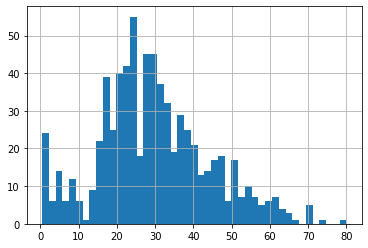

In [88]:
titanic_df['Age'].hist(bins=45)

In [89]:
# let's fill missing age values by their mean gender-wise

In [107]:
titanic_df['Age'] = titanic_df[['Age','Sex']].groupby(['Sex']).transform(lambda x: x.fillna(x.mean()))

In [108]:
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  27.915709   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Embarked  
0        1      0         A/5 21171   7.2500        S  
1        1      0          PC 17599  71.2833        C  
2        0      0  STON/O2. 3101282   7.9250        S  
3        1      0            113803  53.1000        S  
4        0      0            373450   8.0500        S  
..     ...    ...               ...      ...      ...  
886      0      0            211536  13.0000        S  
887      0      0            112053  30.0000        S  
888      1      2        W./C. 6607  23.4500        S  
889      0      0            111369  30.0000        C  
890      0      0            370376   7.7500        Q  

[891 rows x 11 columns]

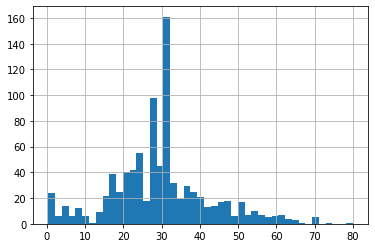

In [109]:
titanic_df['Age'].hist(bins=45) # you can see data gets distorted too much with mean

In [110]:
titanic_df['Age'].isnull().sum()

0

In [111]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [112]:
# So now all null values have been removed

#### Dealing with outliers

In [113]:
dummy_age = [20, 21, 24, 24, 28, 26, 19, 22, 26, 24, 21,
            19, 22, 28, 29, 6, 100, 25, 25, 28, 31]

dummy_height = [150, 151, 155, 153, 280, 160, 158, 157, 158, 145, 150,
               155, 155, 151, 152, 153, 160, 152, 157, 157, 160, 153]

dummy_df = pd.DataFrame(list(zip(dummy_age, dummy_height)),
                        columns =['Age', 'Height'])

In [115]:
dummy_df.head()

Age  Height
0   20     150
1   21     151
2   24     155
3   24     153
4   28     280

In [116]:
import scipy.stats

In [117]:
scipy.stats.zscore(dummy_df['Height'])

array([-0.3861155 , -0.34909072, -0.20099163, -0.27504118,  4.4271051 ,
       -0.01586776, -0.08991731, -0.12694208, -0.08991731, -0.57123937,
       -0.3861155 , -0.20099163, -0.20099163, -0.34909072, -0.31206595,
       -0.27504118, -0.01586776, -0.31206595, -0.12694208, -0.12694208,
       -0.01586776])

In [118]:
abs(scipy.stats.zscore(dummy_df['Height']))

array([0.3861155 , 0.34909072, 0.20099163, 0.27504118, 4.4271051 ,
       0.01586776, 0.08991731, 0.12694208, 0.08991731, 0.57123937,
       0.3861155 , 0.20099163, 0.20099163, 0.34909072, 0.31206595,
       0.27504118, 0.01586776, 0.31206595, 0.12694208, 0.12694208,
       0.01586776])

In [119]:
# Generally values with greater than or equal to 3 z-scores are considered outliers
# z score for observation Xi = (Xi - mean) / STD

In [121]:
z_score_height = abs(scipy.stats.zscore(dummy_df['Height']))

In [122]:
np.where(z_score_height>3)

(array([4], dtype=int64),)

In [124]:
dummy_df.iloc[np.where(z_score_height>=3)] # this will give the outlier values

Age  Height
4   28     280

In [126]:
# let's calculate for age

In [125]:
z_score_age = abs(scipy.stats.zscore(dummy_df['Age']))

Age  Height
16  100     160

In [128]:
z_score_age

array([0.41253324, 0.35399812, 0.17839275, 0.17839275, 0.05574773,
       0.06132251, 0.47106836, 0.29546299, 0.06132251, 0.17839275,
       0.35399812, 0.47106836, 0.29546299, 0.05574773, 0.11428286,
       1.23202494, 4.27027648, 0.11985763, 0.11985763, 0.05574773,
       0.2313531 ])

In [127]:
dummy_df.iloc[np.where(z_score_age>=3)]

Age  Height
16  100     160

In [130]:
# Standard z-scores are more affected by outliers because it uses mean, and mean is easily affected by outliers

In [131]:
# So let's use Median Absolute Deviation instead

In [132]:
scipy.stats.median_absolute_deviation(dummy_df['Height'])

4.4478

In [133]:
mad_height = scipy.stats.median_absolute_deviation(dummy_df['Height'])

In [134]:
modified_z_score = list(dummy_df['Height'].map(lambda x: 0.6745* (x - np.median(dummy_df['Height']))/mad_height))

In [135]:
modified_z_score

[-0.7582400287782725,
 -0.6065920230226179,
 0.0,
 -0.30329601151130897,
 18.95600071945681,
 0.7582400287782725,
 0.45494401726696343,
 0.30329601151130897,
 0.45494401726696343,
 -1.516480057556545,
 -0.7582400287782725,
 0.0,
 0.0,
 -0.6065920230226179,
 -0.45494401726696343,
 -0.30329601151130897,
 0.7582400287782725,
 -0.45494401726696343,
 0.30329601151130897,
 0.30329601151130897,
 0.7582400287782725]

In [137]:
dummy_df.iloc[np.where(np.abs(modified_z_score)>=3)]

Age  Height
4   28     280

In [ ]:
# let's find for age

In [138]:
scipy.stats.median_absolute_deviation(dummy_df['Age'])

4.4478

In [139]:
mad_age = scipy.stats.median_absolute_deviation(dummy_df['Age'])

In [140]:
modified_z_score = list(dummy_df['Age'].map(lambda x: 0.6745* (x - np.median(dummy_df['Age']))/mad_age))

In [141]:
modified_z_score

[-0.6065920230226179,
 -0.45494401726696343,
 0.0,
 0.0,
 0.6065920230226179,
 0.30329601151130897,
 -0.7582400287782725,
 -0.30329601151130897,
 0.30329601151130897,
 0.0,
 -0.45494401726696343,
 -0.7582400287782725,
 -0.30329601151130897,
 0.6065920230226179,
 0.7582400287782725,
 -2.7296641036017806,
 11.52524843742974,
 0.15164800575565449,
 0.15164800575565449,
 0.6065920230226179,
 1.0615360402895813]

In [142]:
dummy_df.iloc[np.where(np.abs(modified_z_score)>=3)]

Age  Height
16  100     160

In [143]:
# using IQR to find outliers

In [144]:
dummy_age = [20, 21, 24, 24, 28, 26, 19, 22, 26, 24, 21,
            19, 22, 28, 29, 6, 100, 25, 25, 28, 31]

dummy_height = [150, 151, 155, 153, 280, 160, 158, 157, 158, 145, 150,
                155, 155, 151, 152, 153, 160, 152, 157, 157, 160, 153]

dummy_df = pd.DataFrame(list(zip(dummy_age, dummy_height)),
                        columns =['Age', 'Height(cm)'])

In [145]:
def get_lower_upper_bound(my_data):
    # Get first and third quartile
    q1 = np.percentile(my_data, 25)
    q3 = np.percentile(my_data, 75)
    
    # Calculate Interquartile range
    iqr = q3 - q1
    
    # Compute lower and upper bound
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return lower_bound, upper_bound

In [146]:
def get_outliers_iqr(my_data):
    lower_bound, upper_bound = get_lower_upper_bound(my_data)
    
    # Filter data less than lower bound and more than upper bound
    return my_data[np.where((my_data > upper_bound) | (my_data < lower_bound))]

In [147]:
get_outliers_iqr(dummy_df['Age'].values)

array([  6, 100], dtype=int64)

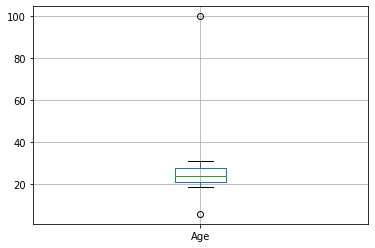

In [149]:
dummy_df.boxplot(column=['Age']) # the same can be verified by box-plot

In [148]:
get_outliers_iqr(dummy_df['Height(cm)'].values)

array([280], dtype=int64)

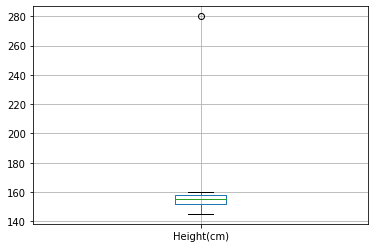

In [150]:
dummy_df.boxplot(column=['Height(cm)'])

#### Univariate Analysis

In [151]:
# skewness - measure of symmetry of distribution
# kurtosis - measure of tail-edness of distribution

In [153]:
atheletes_df = pd.read_csv('31029_40943_compressed_athlete_events.csv.zip')
regions_df = pd.read_csv('datasets_31029_40943_noc_regions.csv')

In [154]:
data_df = pd.merge(atheletes_df, regions_df, on='NOC', how='left')

In [155]:
data_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [156]:
age_df = pd.to_numeric(data_df['Age'], errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)

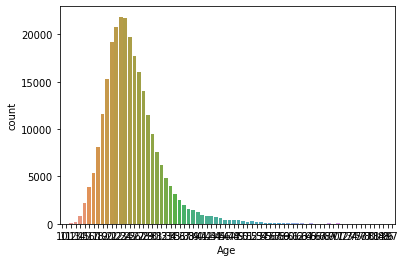

In [157]:
sns.countplot(age_df)

In [158]:
won_medal = data_df.loc[~data_df['Medal'].isnull()]

In [159]:
def plot_column(my_df, col, chart_type='Histogram', dtype=int, bin_size=25):
    temp_df = pd.to_numeric(my_df[col], errors='coerce')
    temp_df = temp_df.dropna()
    temp_df = temp_df.astype(dtype)
    if chart_type=='Histogram':
        ax = sns.countplot(temp_df)
    elif chart_type=='Density':
        ax = sns.distplot(temp_df)
    xmin, xmax = ax.get_xlim()
    ax.set_xticks(np.round(np.linspace(xmin, xmax, bin_size), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()

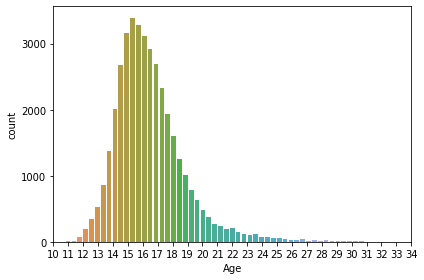

In [162]:
plot_column(won_medal, 'Age')

In [165]:
from scipy.stats import skew
age_df = pd.to_numeric(won_medal['Age'], errors='coerce')
age_df = age_df.dropna()
age_df = age_df.astype(int)

In [166]:
skew(age_df) # calculate skewness

1.497531959387686

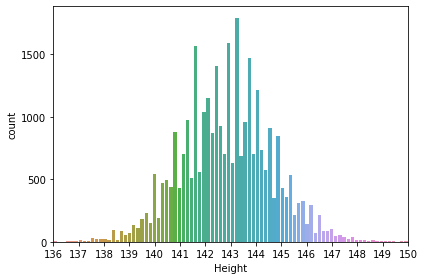

In [168]:
plot_column(won_medal, 'Height', bin_size=15)

In [169]:
Height_df = pd.to_numeric(won_medal['Height'], errors='coerce')
Height_df = Height_df.dropna()
Height_df = Height_df.astype(int)

skew(Height_df)

0.046825246979302765

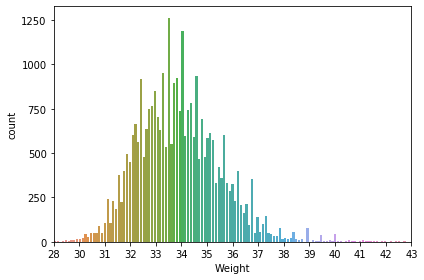

In [170]:
plot_column(won_medal, 'Weight', bin_size=15)

In [171]:
Weight_df = pd.to_numeric(won_medal['Weight'], errors='coerce')
Weight_df = Weight_df.dropna()
Weight_df = Weight_df.astype(int)

In [172]:
skew(Weight_df)

0.6921002780813605

#### Bi-variate analysis

In [185]:
# scatter plots

In [174]:
x1 = np.random.normal(10, 1, 200) * 10

In [175]:
x1

array([112.07864694,  92.16665329, 101.71418375, 109.787346  ,
       113.17804631,  94.74044432, 123.03002592, 103.67293843,
       116.7090485 ,  79.00783718, 119.72156897, 106.4191922 ,
        95.12626523, 100.16106053,  79.80046217,  95.13374225,
       104.17982762,  93.22555894, 100.71608782,  89.81801307,
       104.52327197, 113.04614298,  87.72706737,  97.97666648,
        87.87127274, 103.08081637,  96.21701189,  98.55786365,
       106.3516956 , 109.04155791, 116.84826992, 116.24669527,
        93.88673948,  99.34603179,  91.02992574, 104.03780138,
       110.59011375,  94.81988691,  94.5612373 , 117.27843706,
       101.85700047, 101.11523486, 111.10444696,  84.464362  ,
       104.37596137, 107.15092955,  96.94291458, 100.68188075,
       104.2782886 , 109.75807655, 105.82895485,  87.2952447 ,
       102.97091106, 117.36957045, 118.92044563,  95.21225729,
       110.56037533,  93.23314625,  92.0455942 ,  94.8706527 ,
        98.46899943, 107.02491582, 115.18069438, 102.94

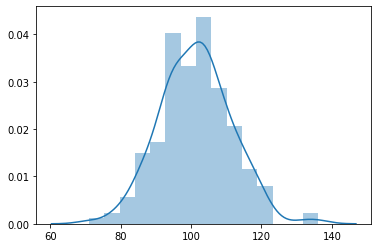

In [176]:
sns.distplot(x1)

In [177]:
y1 = 100 - x1 # that means y1 and x1 have negative correlation

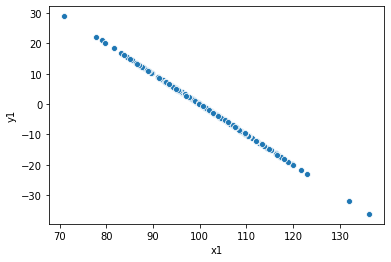

In [178]:
ax = sns.scatterplot(x1, y1,)
ax.set(xlabel='x1', ylabel='y1')
plt.show()

In [179]:
from scipy.stats import pearsonr

pearsonr(x1, y1)

(-1.0, 0.0)

In [180]:
x2 = np.random.normal(10, 1, 200) * 10

y2 = x2 + np.random.normal(40, 5.2, 200)

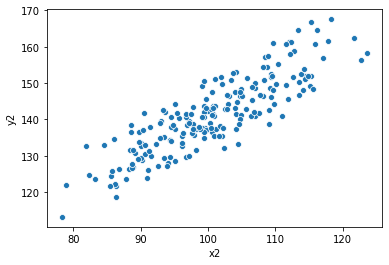

In [181]:
ax = sns.scatterplot(x2, y2,)
ax.set(xlabel='x2', ylabel='y2')
plt.show()

In [182]:
pearsonr(x2, y2)

(0.8640803831637613, 6.119305763971814e-61)

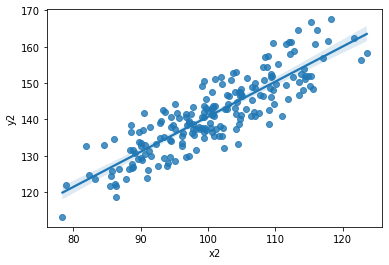

In [183]:
ax = sns.regplot(x2, y2,)
ax.set(xlabel='x2', ylabel='y2')
plt.show()

In [186]:
# heatmaps

In [188]:
x3 = np.random.random(200)

y3 = x1 + x3 - 20

x4 = np.random.normal(100, 1.5, 200)
y4 = x1 + x4 + x2

data_df = pd.DataFrame({'x1': x1, 'x2': x2,'x3': x3,
                        'x4': x4, 'y1': y1,'y2': y2,
                        'y3': y3, 'y4': y4})

In [189]:
data_df.head()

x1          x2        x3          x4         y1          y2  \
0  112.078647  108.434014  0.448366  100.087483 -12.078647  157.277425   
1   92.166653  100.553147  0.030080   98.837969   7.833347  136.401321   
2  101.714184  113.498044  0.084683   97.969201  -1.714184  146.664364   
3  109.787346   95.645052  0.804992  100.941195  -9.787346  140.347656   
4  113.178046   90.192351  0.937841  102.474325 -13.178046  128.860322   

          y3          y4  
0  92.527013  320.600144  
1  72.196733  291.557769  
2  81.798867  313.181428  
3  90.592338  306.373593  
4  94.115888  305.844722

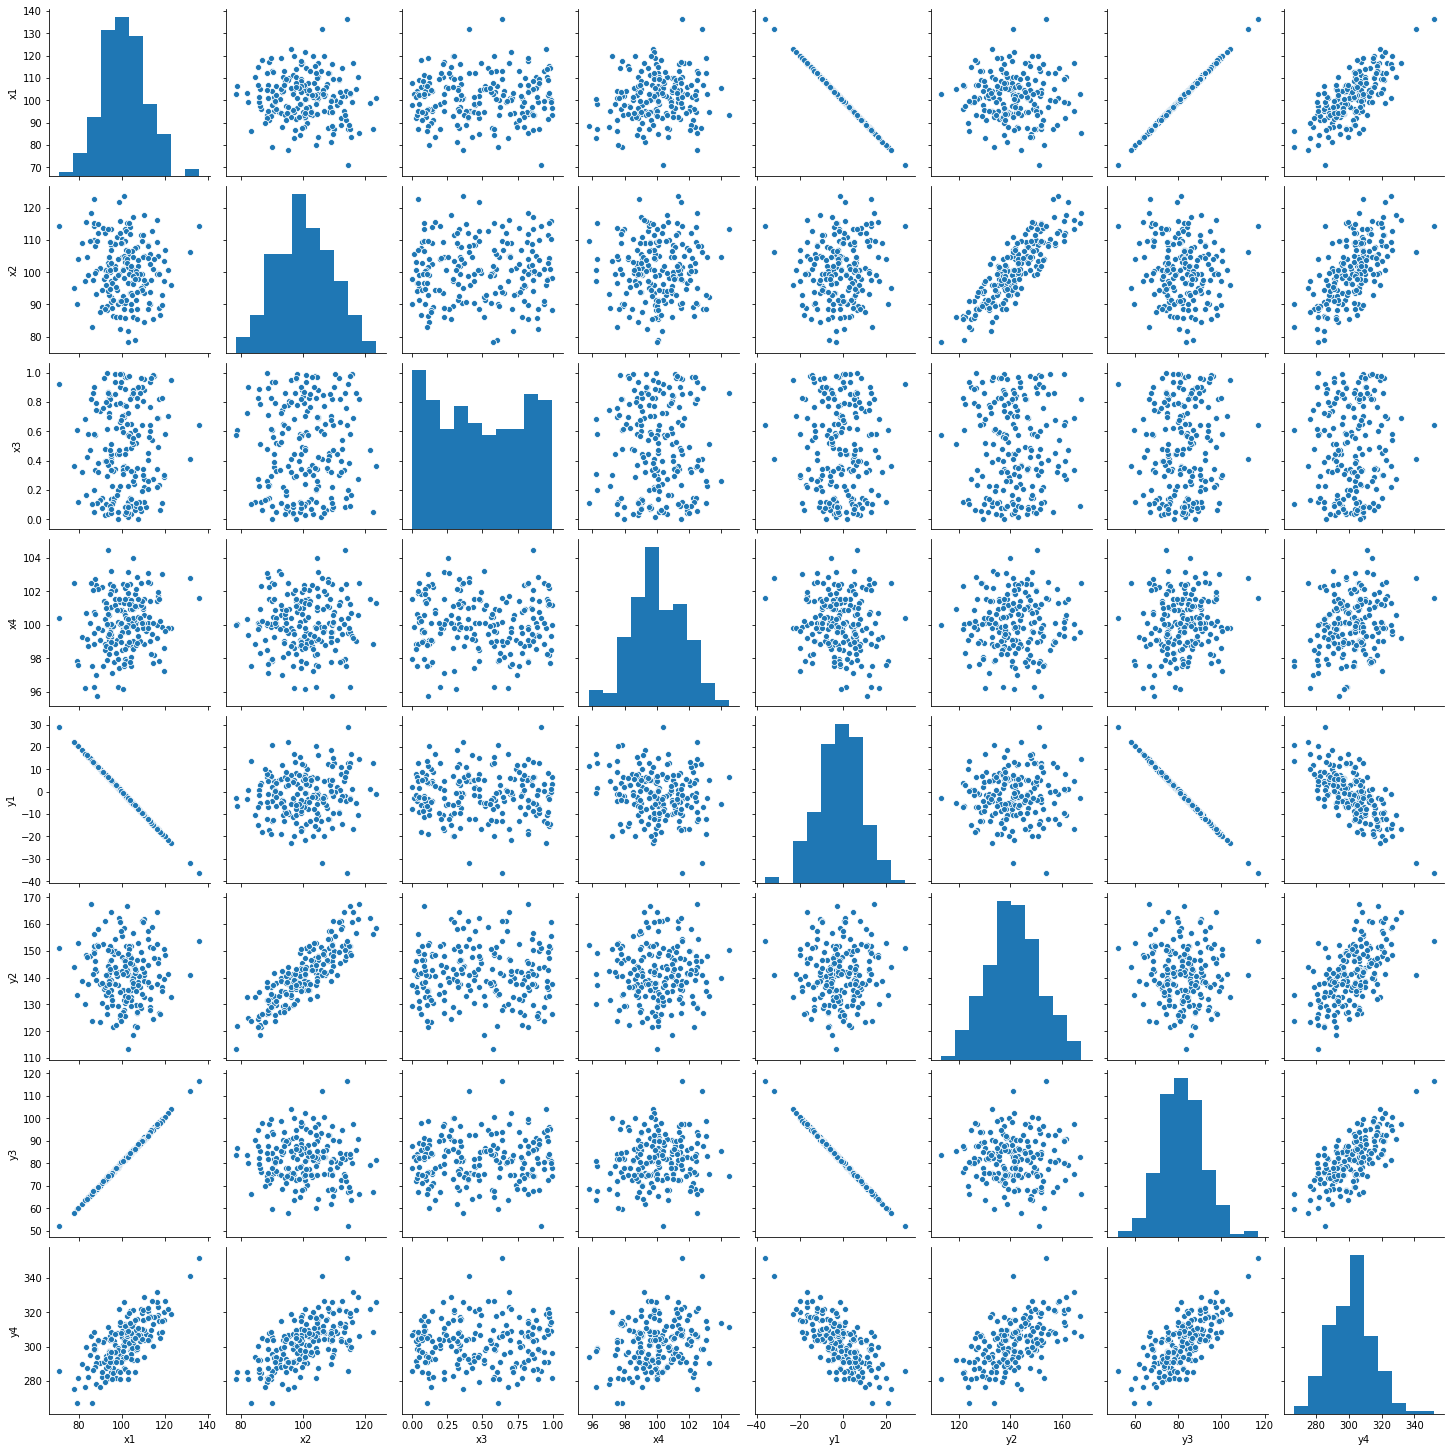

In [190]:
sns.pairplot(data_df)

In [191]:
data_df.corr()

x1        x2        x3        x4        y1        y2        y3  \
x1  1.000000 -0.084065  0.043074  0.151706 -1.000000 -0.041045  0.999545   
x2 -0.084065  1.000000  0.032428  0.013536  0.084065  0.864080 -0.082939   
x3  0.043074  0.032428  1.000000 -0.010525 -0.043074 -0.016449  0.073197   
x4  0.151706  0.013536 -0.010525  1.000000 -0.151706  0.028316  0.151122   
y1 -1.000000  0.084065 -0.043074 -0.151706  1.000000  0.041045 -0.999545   
y2 -0.041045  0.864080 -0.016449  0.028316  0.041045  1.000000 -0.041469   
y3  0.999545 -0.082939  0.073197  0.151122 -0.999545 -0.041469  1.000000   
y4  0.716730  0.624280  0.053539  0.245337 -0.716730  0.565331  0.717088   

          y4  
x1  0.716730  
x2  0.624280  
x3  0.053539  
x4  0.245337  
y1 -0.716730  
y2  0.565331  
y3  0.717088  
y4  1.000000

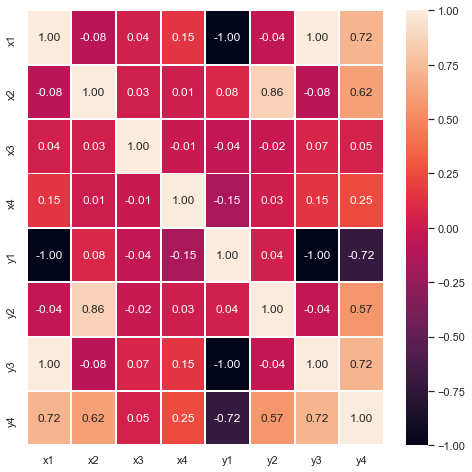

In [192]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_df.corr(), annot=True,
                 linewidths=1, fmt='.2f')

In [193]:
# Bivariate Titanic analysis

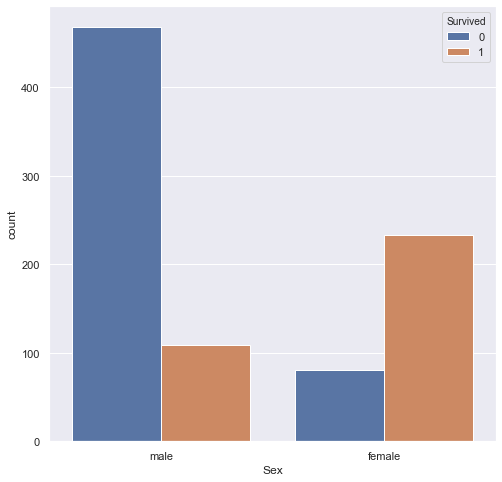

In [194]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)

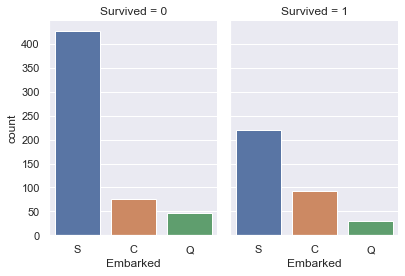

In [195]:
sns.catplot(x="Embarked", col="Survived",
                 data=titanic_df, kind="count",
                 height=4, aspect=.7)

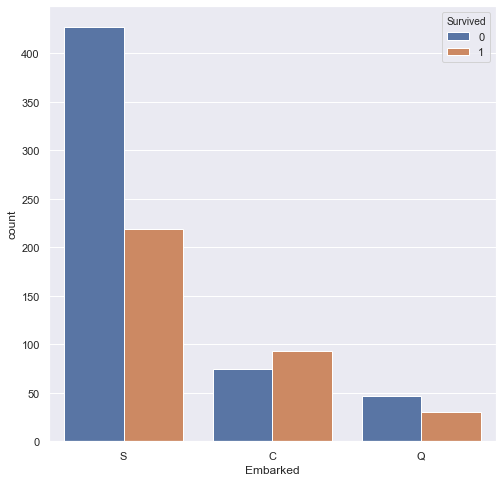

In [197]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)

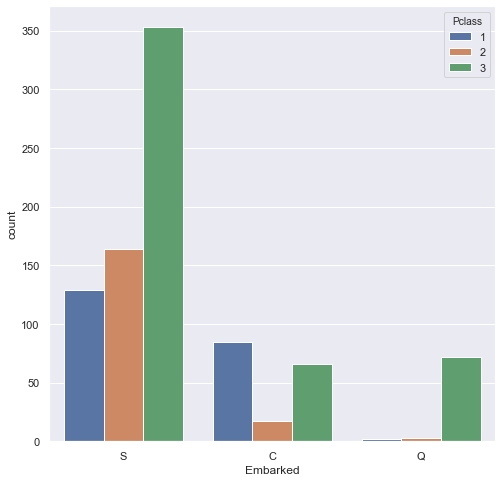

In [198]:
sns.countplot(x='Embarked', hue='Pclass', data=titanic_df)

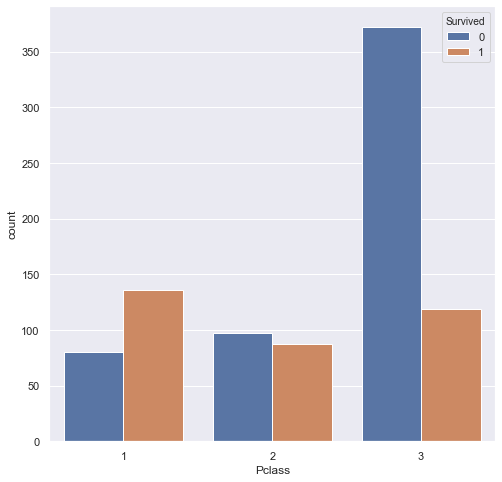

In [199]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

In [201]:
titanic_df['Family Size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [202]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Family Size  
0      0         A/5 21171   7.2500        S            2  
1      0          PC 17599  71.2833        C            2  
2      0  STON/O2. 3101282   7.9250        S            1  
3      0            113803  53.1000        S            2  
4      0            373450   8.0500        S            1

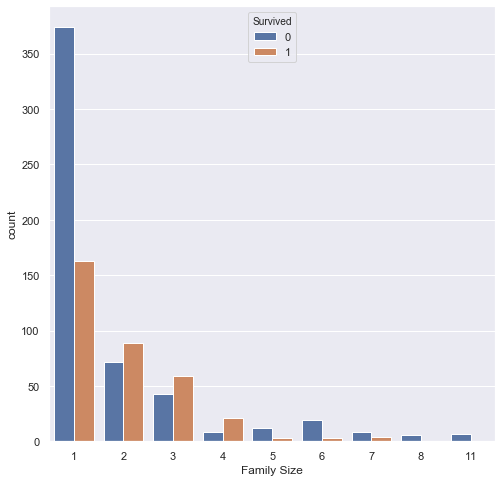

In [204]:
sns.countplot(x="Family Size", hue="Survived", data=titanic_df)

In [205]:
age_df = titanic_df[~titanic_df['Age'].isnull()]

age_bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

age_df['ageGroup'] = pd.cut(titanic_df.Age, range(0, 81, 10), right=False, labels=age_bins)

In [206]:
age_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Family Size ageGroup  
0      0         A/5 21171   7.2500        S            2    20-29  
1      0          PC 17599  71.2833        C            2    30-39  
2      0  STON/O2. 3101282   7.9250        S            1    20-29  
3      0            113803  53.1000        S            2    30-39  
4      0            373450   8.0500        S            1    30-39

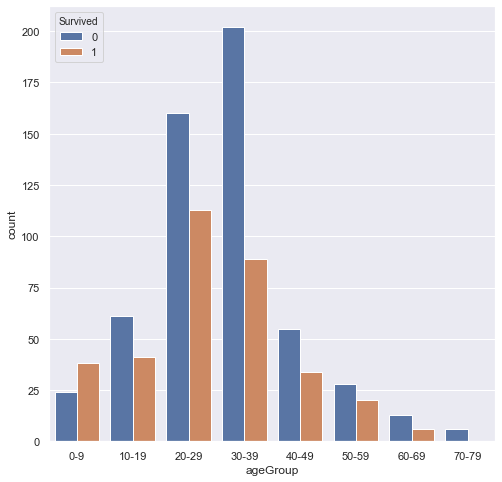

In [207]:
sns.countplot(x='ageGroup', hue='Survived', data=age_df)

In [208]:
# Bivariate analysis of video game data

In [209]:
data_df = pd.read_csv('Video_Games_Sales.csv.zip')

In [210]:
data_df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [211]:
data_df.describe().T

count         mean         std      min      25%      50%  \
Year_of_Release  16450.0  2006.487356    5.878995  1980.00  2003.00  2007.00   
NA_Sales         16719.0     0.263330    0.813514     0.00     0.00     0.08   
EU_Sales         16719.0     0.145025    0.503283     0.00     0.00     0.02   
JP_Sales         16719.0     0.077602    0.308818     0.00     0.00     0.00   
Other_Sales      16719.0     0.047332    0.186710     0.00     0.00     0.01   
Global_Sales     16719.0     0.533543    1.547935     0.01     0.06     0.17   
Critic_Score      8137.0    68.967679   13.938165    13.00    60.00    71.00   
Critic_Count      8137.0    26.360821   18.980495     3.00    12.00    21.00   
User_Count        7590.0   162.229908  561.282326     4.00    10.00    24.00   

                     75%       max  
Year_of_Release  2010.00   2020.00  
NA_Sales            0.24     41.36  
EU_Sales            0.11     28.96  
JP_Sales            0.04     10.22  
Other_Sales         0.03     10.57  
Global_Sales        0.47     82.53  
Critic_Score       79.00     98.00  
Critic_Count       36.00    113.00  
User_Count         81.00  10665.00

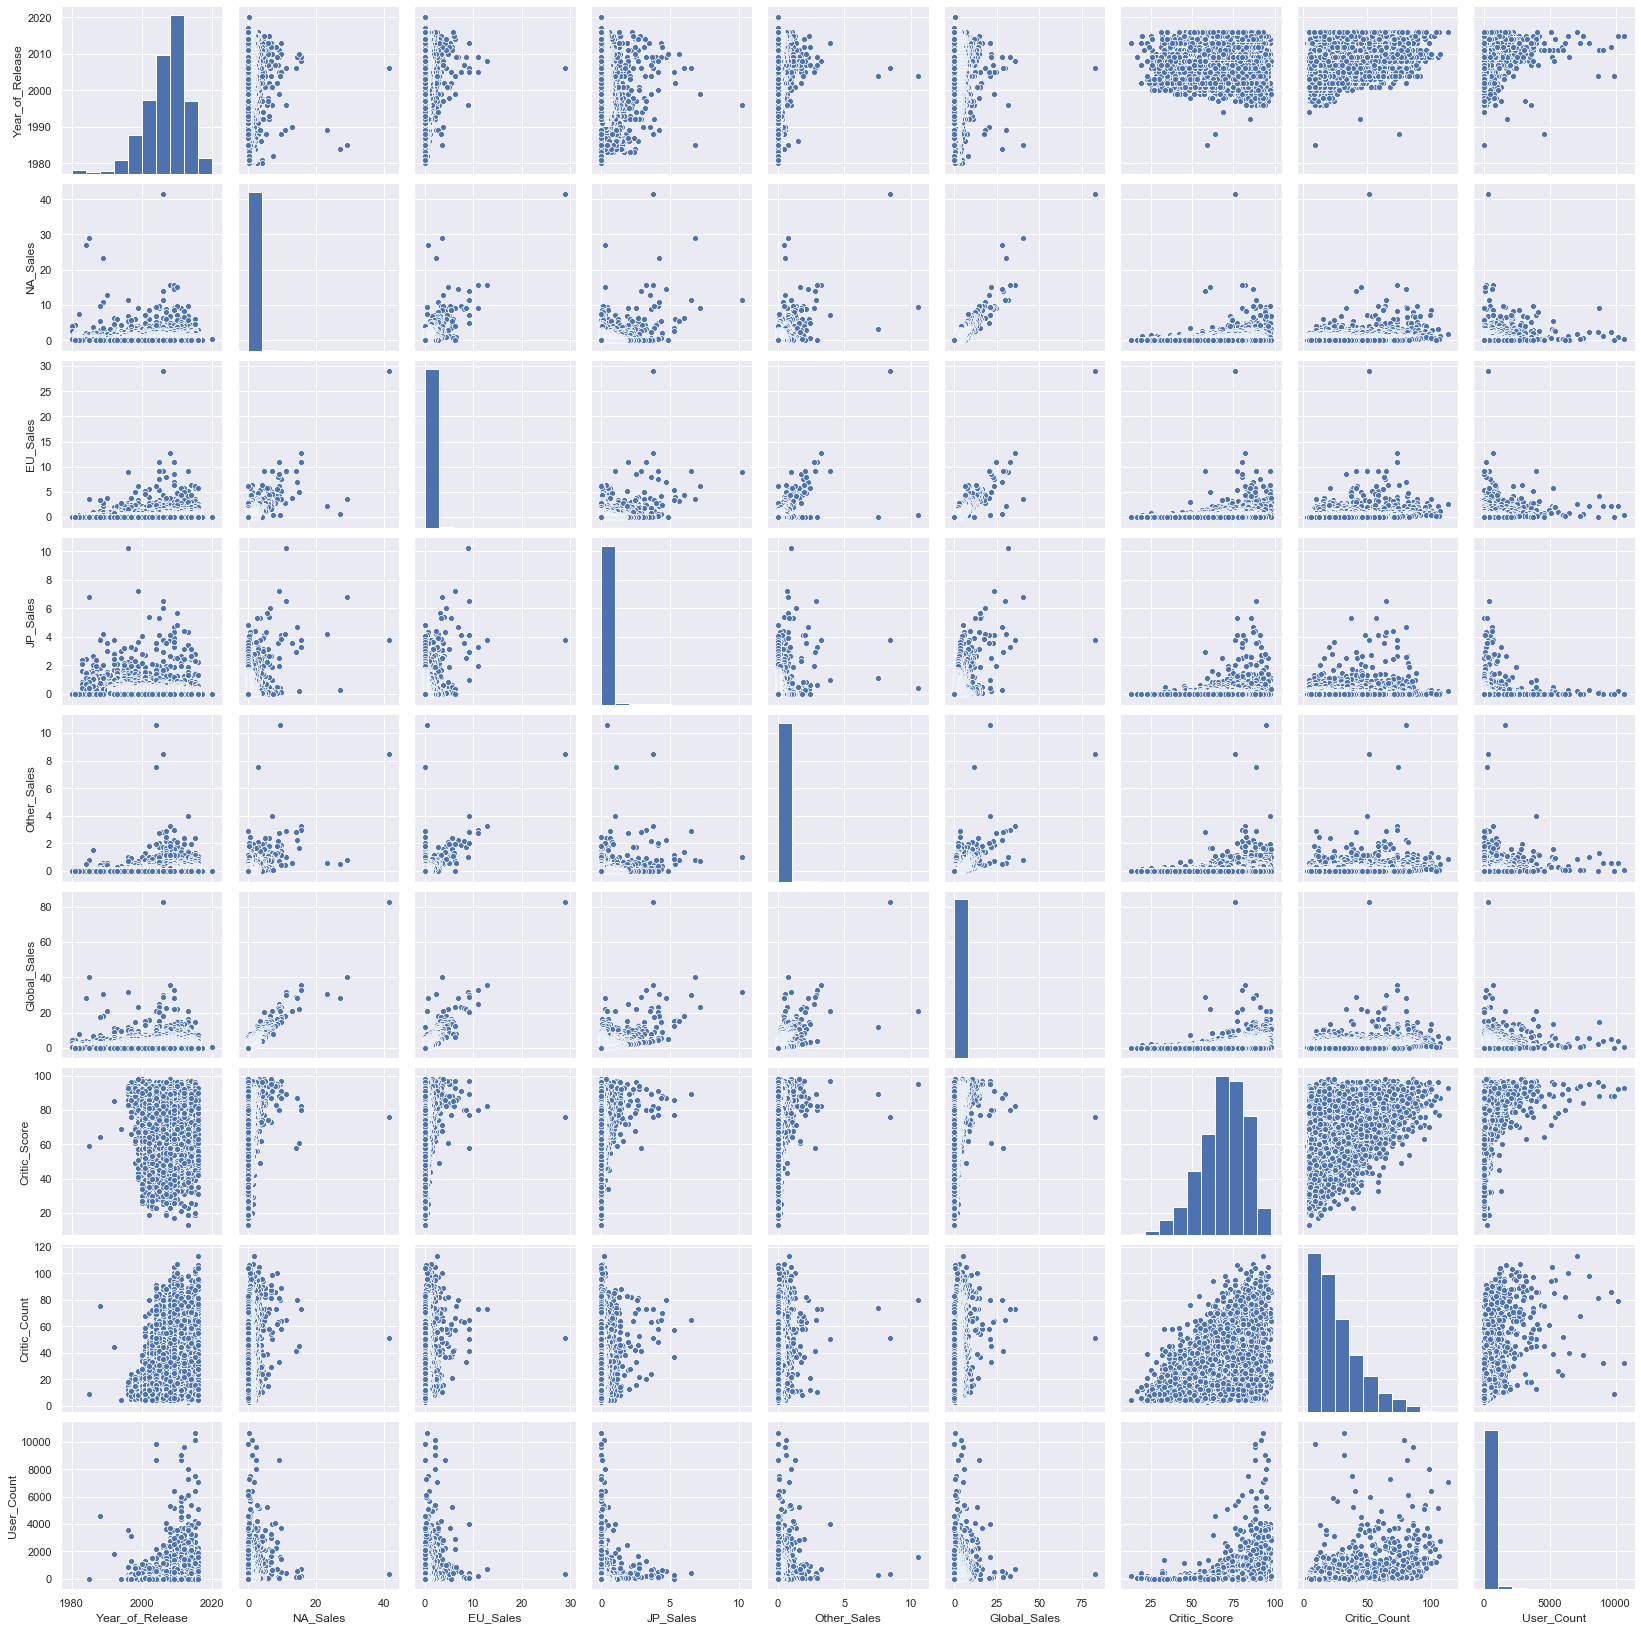

In [212]:
sns.pairplot(data_df)

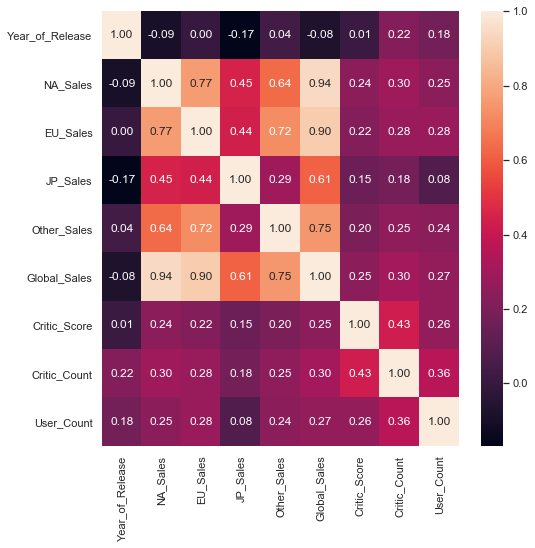

In [213]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data_df.corr(), annot=True, fmt='.2f')

In [214]:
score_df = data_df[['Critic_Score', 'User_Score']]

score_df = score_df[score_df['User_Score']!='tbd']

score_df['User_Score'] = pd.to_numeric(score_df['User_Score'], errors='coerce')

score_df.dropna(how='any', inplace=True)

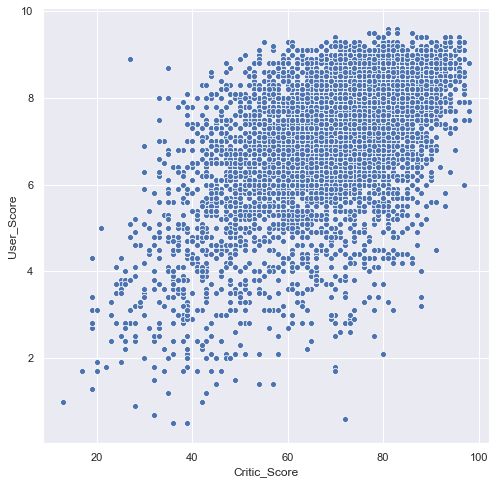

In [215]:
sns.scatterplot(x=score_df['Critic_Score'], y=score_df['User_Score'])

In [216]:
score_df.corr()

Critic_Score  User_Score
Critic_Score      1.000000    0.580878
User_Score        0.580878    1.000000

In [217]:
score_df.corr(method='spearman')

Critic_Score  User_Score
Critic_Score      1.000000    0.536182
User_Score        0.536182    1.000000

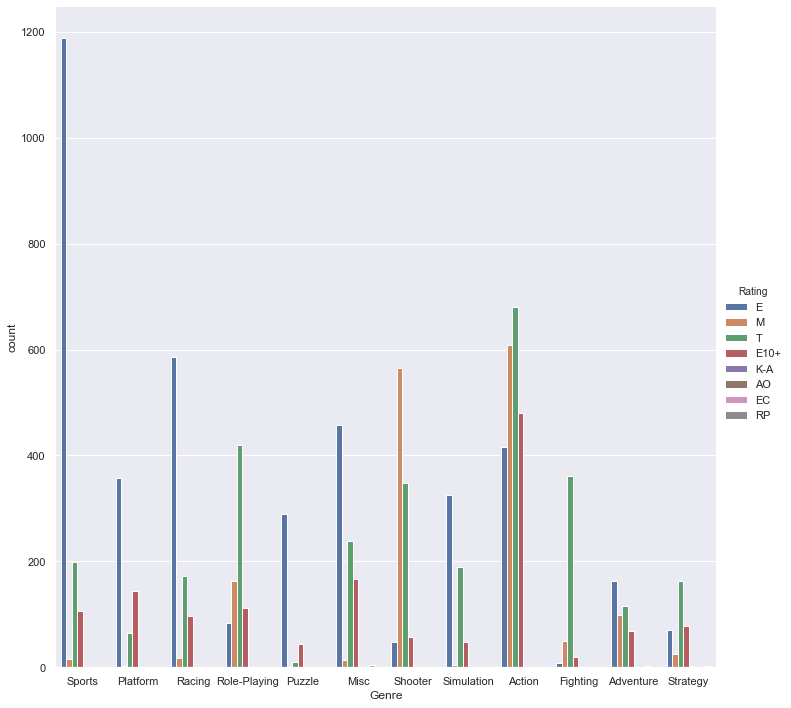

In [218]:
sns.catplot(x="Genre", hue="Rating", 
                 data=data_df, kind="count",
                 height=10)

In [221]:
# Bokeh plot - opens up in IE window

from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, LegendItem

count_year_gen = pd.DataFrame({'count' : data_df.groupby( [ "Genre", "Year_of_Release"] ).size()}).reset_index()

p = figure(plot_width=800, plot_height=550)
p.background_fill_color = "beige"

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for genre_id in count_year_gen['Genre'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(count_year_gen[count_year_gen['Genre']==genre_id])
    p.line(df['Year_of_Release'], df['count'], line_width=2, alpha=0.8, color=color, legend=genre_id)

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

In [222]:
# Top Publisher by Genre

data_df.groupby('Genre')['Publisher'].apply(lambda x: x.value_counts().index[0])

Genre
Action                  Activision
Adventure             Idea Factory
Fighting        Namco Bandai Games
Misc                       Ubisoft
Platform                  Nintendo
Puzzle                    Nintendo
Racing             Electronic Arts
Role-Playing    Namco Bandai Games
Shooter                 Activision
Simulation                 Ubisoft
Sports             Electronic Arts
Strategy        Namco Bandai Games
Name: Publisher, dtype: object

#### Multivariate analysis

In [223]:
# Titanic data set

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


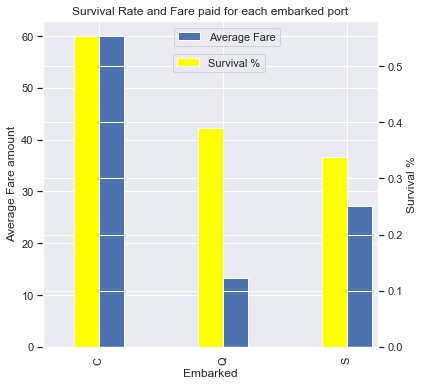

In [225]:
fig1 = plt.figure()
first_axis = fig1.add_subplot(111) 
second_axis = first_axis.twinx()

#The scales of the y-axis on the left and
# right hand side are different .

#group data by fare paid and port of embarkment
survived_df = titanic_df.groupby(['Embarked']).mean()[["Survived"]]
fare_df = titanic_df.groupby(['Embarked']).mean()[["Fare"]]

#plot data for fare and port of embarkment
fare_df.plot(kind='bar',grid=True,ax=first_axis,width=0.2,position=0)
survived_df.plot(kind='bar',color='yellow',ax=second_axis,grid=True,width=0.2, position=1,figsize=(6,6))

#set axis
first_axis.set_ylabel('Average Fare amount')
second_axis.set_ylabel('Survival %')

#display legend
first_axis.legend(["Average Fare"], loc="center", bbox_to_anchor=(0.55, 0.95))
second_axis.legend(["Survival %"],loc="center", bbox_to_anchor=(0.525, 0.87))

plt.title('Survival Rate and Fare paid for each embarked port')
fig1.show()

In [226]:
survived_df

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009

In [227]:
fare_df

Fare
Embarked           
C         59.954144
Q         13.276030
S         27.243651

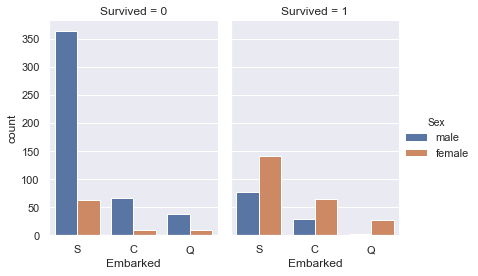

In [228]:
sns.catplot(x="Embarked", hue="Sex", col="Survived",
                 data=titanic_df, kind="count",
                 height=4, aspect=.7)

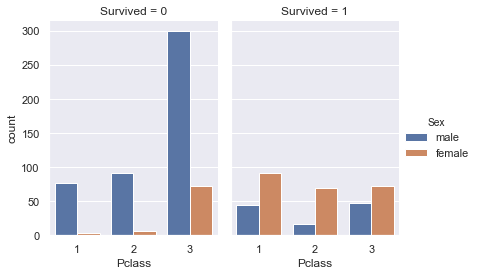

In [229]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                 data=titanic_df, kind="count",
                 height=4, aspect=.7)

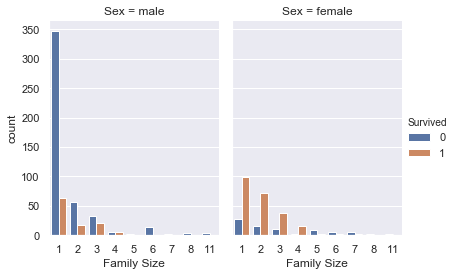

In [231]:
sns.catplot(x="Family Size", hue="Survived", col="Sex",
                 data=titanic_df, kind="count",
                 height=4, aspect=.7)

In [232]:
# Pokemon dataset

In [233]:
pokemon_df = pd.read_csv('Pokemon.csv', index_col=0)

In [234]:
pokemon_df.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

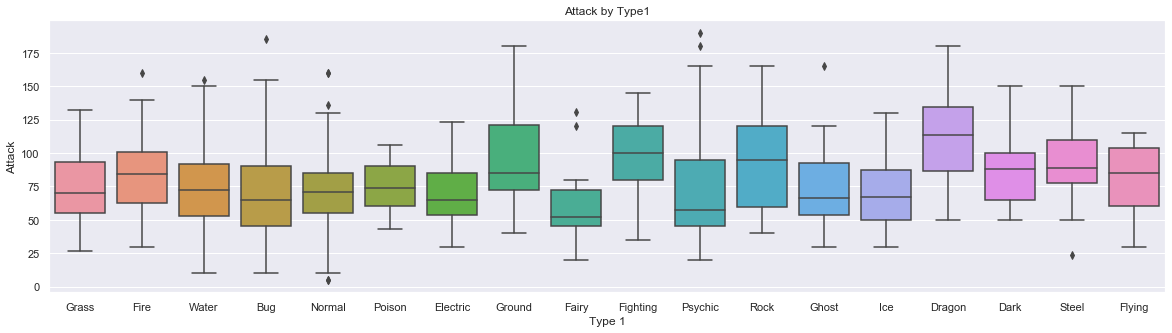

In [235]:
plt.subplots(figsize = (20,5))
plt.title('Attack by Type1')
sns.boxplot(x = "Type 1", y = "Attack",data = pokemon_df)

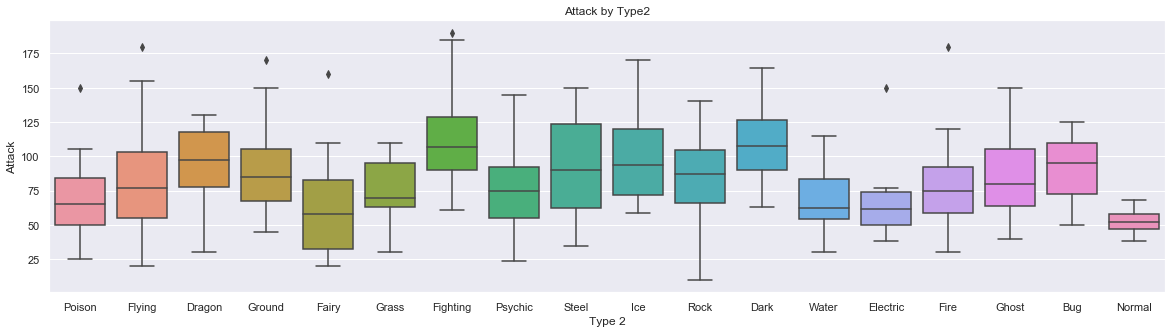

In [236]:
plt.subplots(figsize = (20,5))
plt.title('Attack by Type2')
sns.boxplot(x = "Type 2", y = "Attack",data = pokemon_df)

#### Final Section - White Wine / Red Wine analysis

In [237]:
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

In [238]:
red_wine_df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

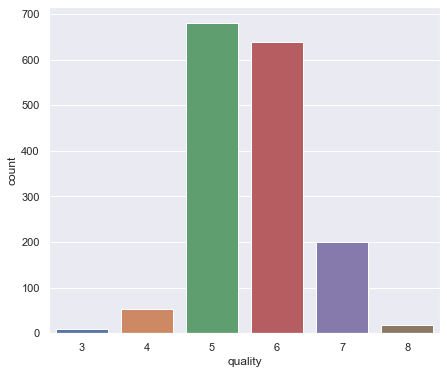

In [239]:
sns.set(rc={'figure.figsize':(7,6)})
sns.countplot(red_wine_df['quality'])

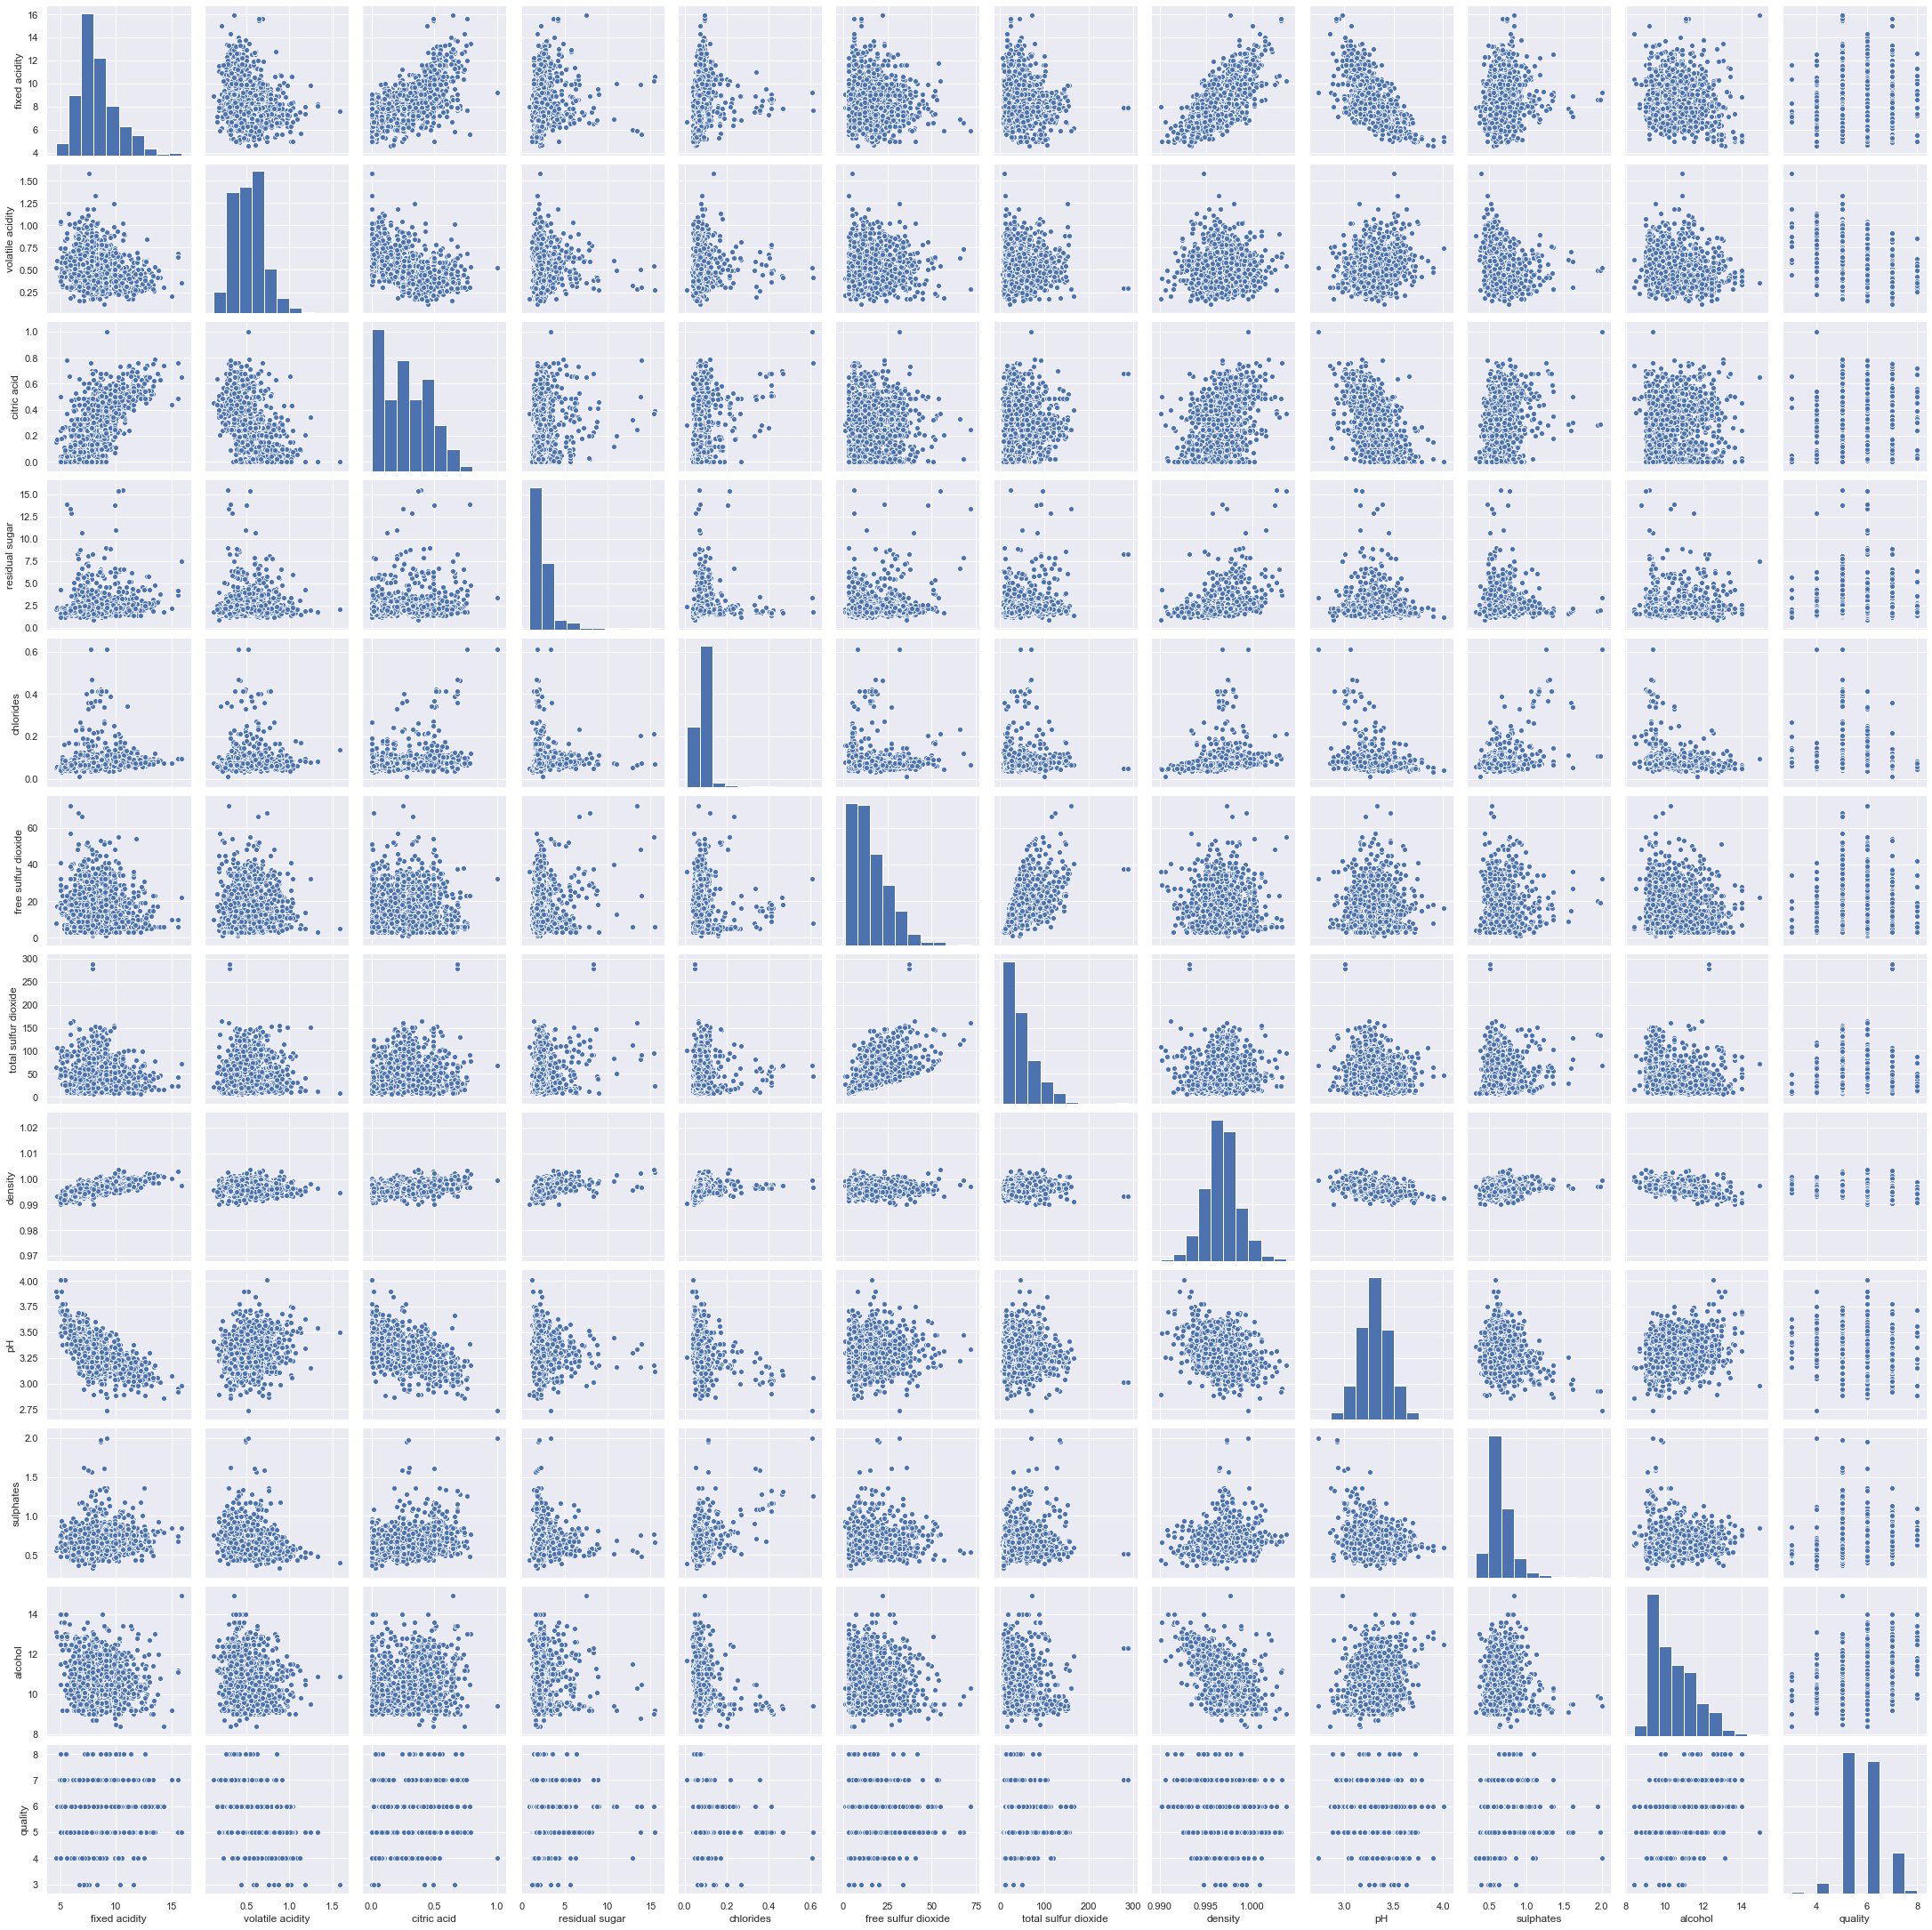

In [240]:
sns.pairplot(red_wine_df)

In [241]:
red_wine_df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

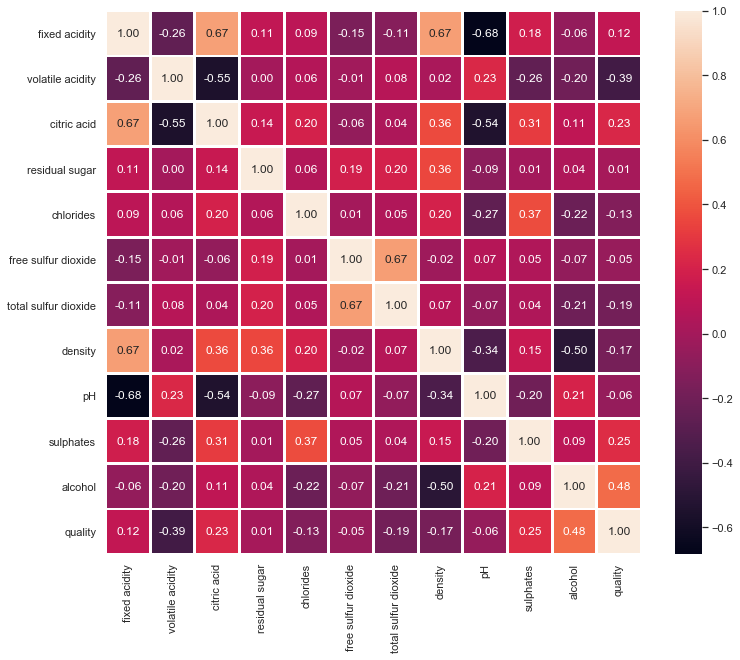

In [242]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(red_wine_df.corr(), annot=True, fmt='.2f', linewidths=2)

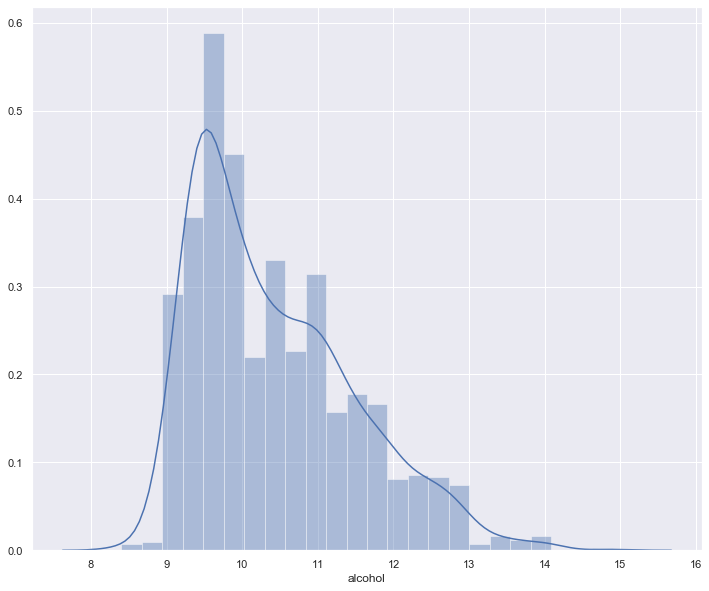

In [243]:
sns.distplot(red_wine_df['alcohol'])

In [244]:
skew(red_wine_df['alcohol'])

0.8600210646566755

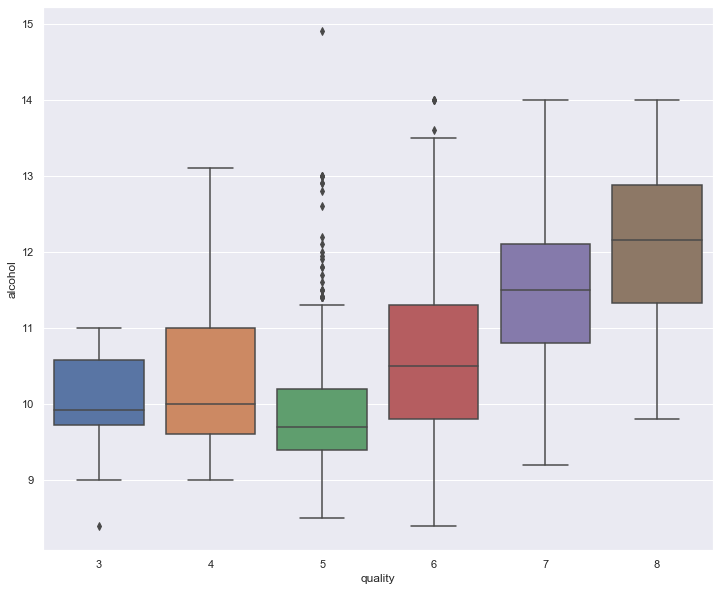

In [245]:
sns.boxplot(x='quality', y='alcohol', data=red_wine_df)

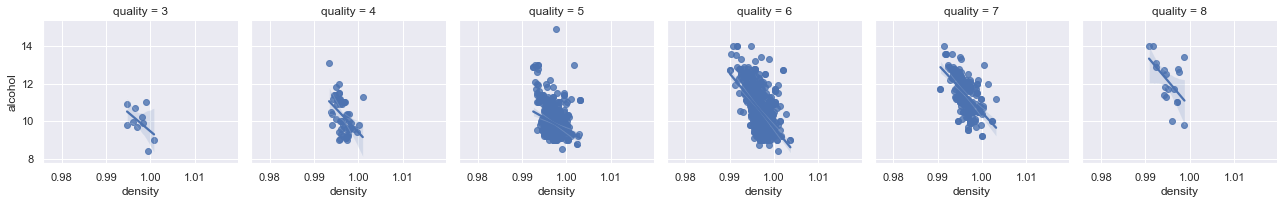

In [247]:
sns.FacetGrid(red_wine_df, col="quality").map(sns.regplot, "density", "alcohol")

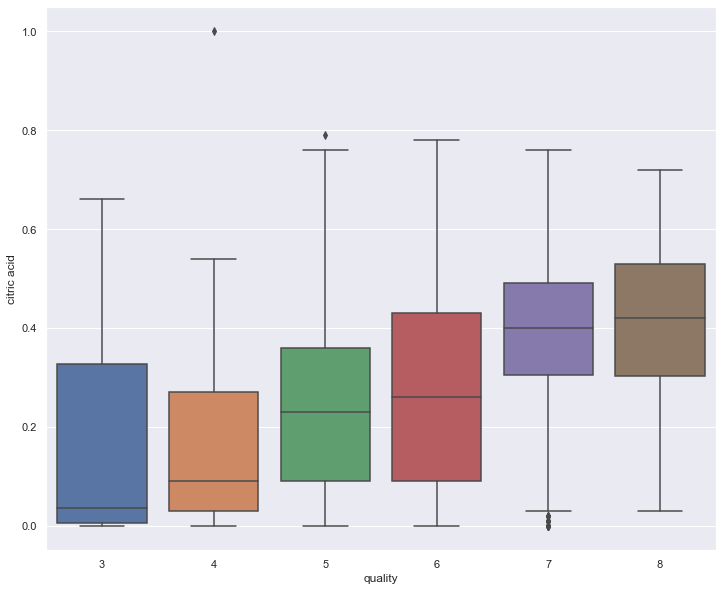

In [248]:
sns.boxplot(x='quality', y='citric acid', data=red_wine_df)

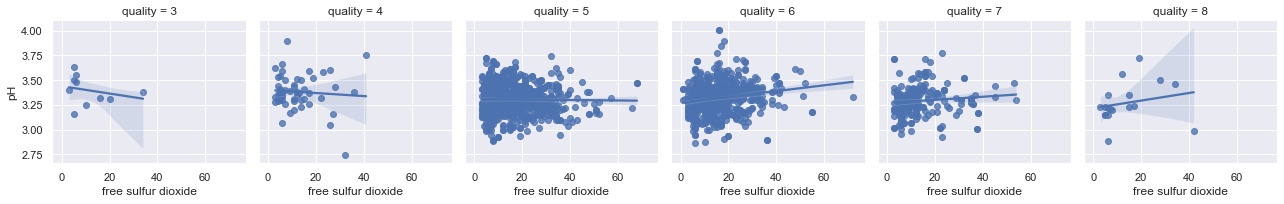

In [249]:
sns.FacetGrid(red_wine_df, col="quality").map(sns.regplot, "free sulfur dioxide", "pH")

In [250]:
# Similar analysis can be done for White Wine

In [251]:
# Now let's do Red Wine v/s White Wine analysis

In [259]:
white_wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

In [260]:
red_wine_df['type']='red'
white_wine_df['type']='white'

In [261]:
wines_df = pd.concat([red_wine_df, white_wine_df])

In [264]:
wines_df.sample(4)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
126             7.4              0.39         0.23             7.0      0.033   
243            15.0              0.21         0.44             2.2      0.075   
2193            7.1              0.18         0.32            12.2      0.048   
3883            6.8              0.33         0.31             7.4      0.045   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
126                  29.0                 126.0  0.99400  3.14       0.42   
243                  10.0                  24.0  1.00005  3.07       0.84   
2193                 36.0                 125.0  0.99670  2.92       0.54   
3883                 34.0                 143.0  0.99226  3.06       0.55   

      alcohol  quality   type  
126      10.5        5  white  
243       9.2        7    red  
2193      9.4        6  white  
3883     12.2        6  white

In [266]:
wines_df.isnull().sum().sum() # this means there are no null values in the dataset

0

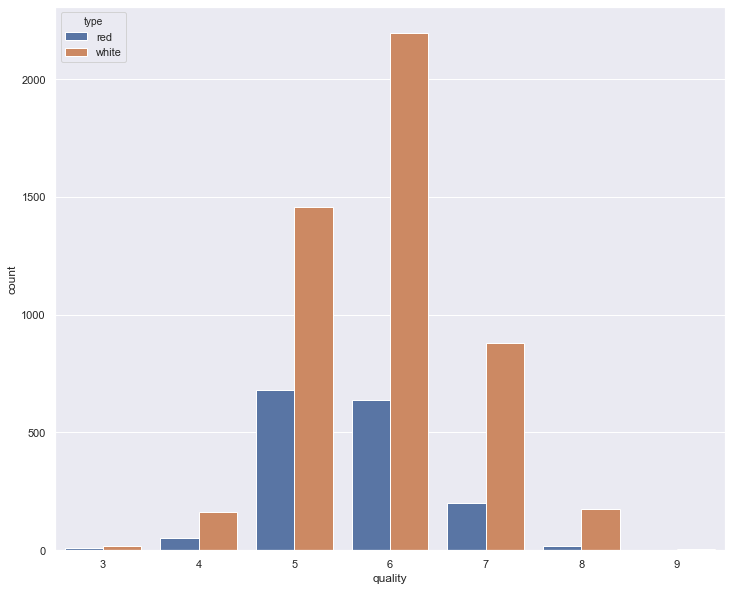

In [267]:
sns.countplot(x='quality', hue='type', data=wines_df)

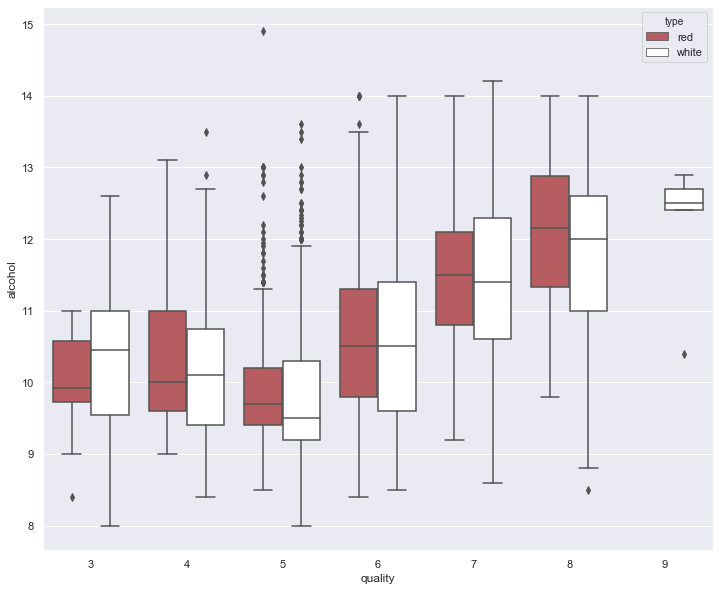

In [268]:
sns.boxplot(x='quality',y='alcohol', hue='type', data=wines_df, palette=["r", "w"])

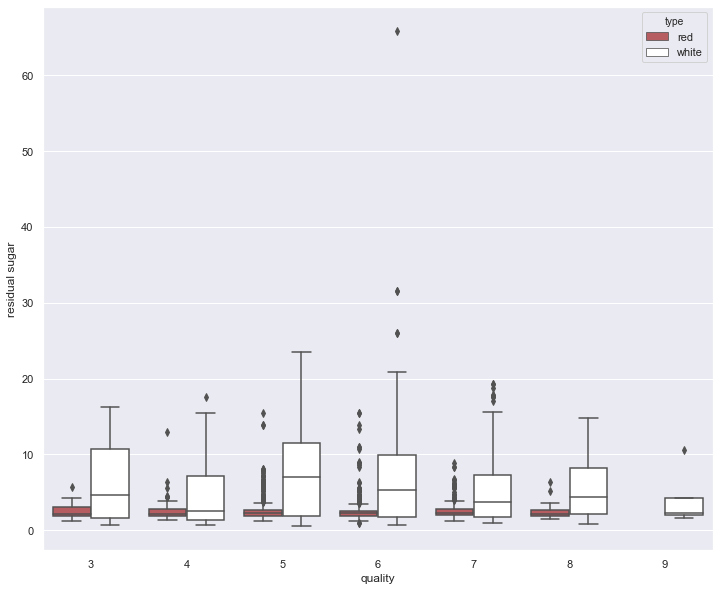

In [269]:
sns.boxplot(x='quality',y='residual sugar', hue='type', 
            data=wines_df, palette=["r", "w"]) # this shows white wine has more sugar

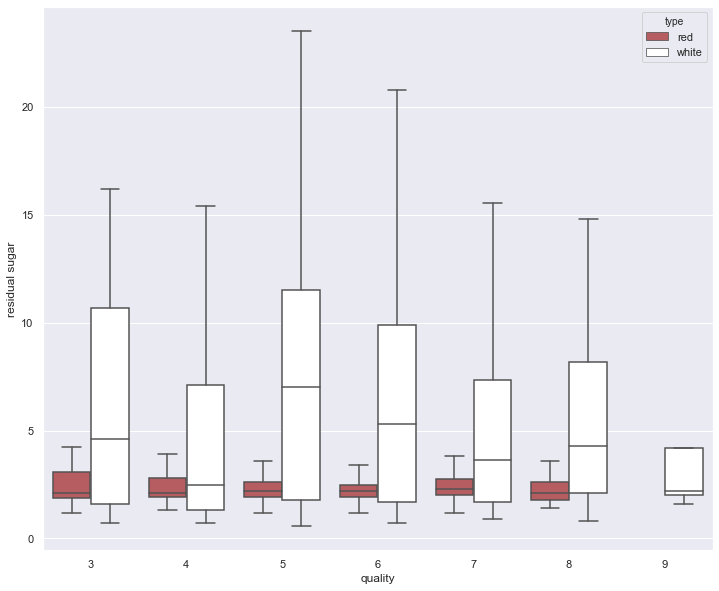

In [270]:
# In the above boxplot we can ignore the outliers using showfliers option

sns.boxplot(x='quality',y='residual sugar', hue='type', 
            data=wines_df, palette=["r", "w"], showfliers=False)

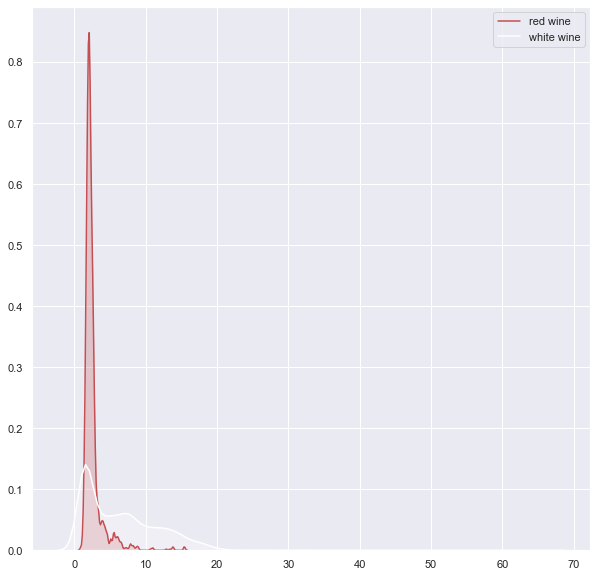

In [272]:
sns.set(rc={'figure.figsize':(10,10)})
p1=sns.kdeplot(red_wine_df['residual sugar'], shade=True, color = "r", label="red wine")
p1=sns.kdeplot(white_wine_df['residual sugar'], shade=True, color="w", label="white wine")

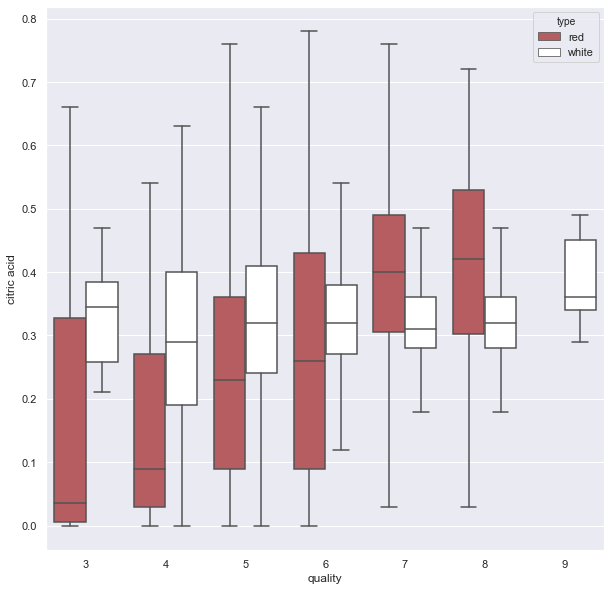

In [273]:
sns.boxplot(x='quality',y='citric acid', hue='type', data=wines_df,
            palette=["r", "w"], showfliers=False)